In [ ]:
#Basic EDA using data scraped and saved at https://github.com/Dean-A-Z/one.git

In [10]:
import pandas as pd
import numpy as np

In [14]:
#import libraries for graphing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
datasetURL = 'https://raw.githubusercontent.com/Dean-A-Z/one/main/ChampionshipPlayersData.csv'

In [8]:
df = pd.read_csv(datasetURL)

In [9]:
#Let us get an initial view of the dataset
df

,Name,Position,Appearances,Club,Age,Country
0,Dominic Hyam,Defender,9,Coventry City,25,Scotland
1,Sam Surridge,Forward,12,Stoke City,23,England
2,Ryan Christie,Midfielder,18,AFC Bournemouth,26,Scotland
3,Ryan Nyambe,Defender,7,Blackburn Rovers,23,England
4,Karlan Ahearne-Grant,Forward,9,West Bromwich Albion,23,England
...,...,...,...,...,...,...
518,Daniel Bentley,Goalkeeper,9,Bristol City,28,England
519,George Thomas,Midfielder,7,Queens Park Rangers,24,Wales
520,Rhys Norrington-Davies,Defender,7,Sheffield United,22,Wales
521,Anfernee Dijksteel,Midfielder,8,Middlesbrough,24,Netherlands


In [ ]:
#The dataset contains basic information of the 523 championship players scraped from the website 'FootyStats'. The code used to scrape this data can be found on GitHib at:

In [11]:
df.shape

(523, 6)

In [13]:
#Using .info() we can start to be able to describe the data. We have the data type and number of non-nulls for each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         523 non-null    object
 1   Position     523 non-null    object
 2   Appearances  523 non-null    int64 
 3   Club         523 non-null    object
 4   Age          523 non-null    int64 
 5   Country      523 non-null    object
dtypes: int64(2), object(4)
memory usage: 24.6+ KB


In [ ]:
#In this case, the small dataset includes only integers and objects. 

In [ ]:
#Exploratory Analysis and Visualization

In [17]:
df.describe()

,Appearances,Age
count,523.000000,523.000000
mean,6.896750,24.474187
std,3.205725,6.871341
min,0.000000,0.000000
25%,4.000000,22.000000
50%,7.000000,25.000000
75%,9.000000,28.500000
max,18.000000,39.000000


In [ ]:
#before plotting it can be useful to get some insights using .describe. 
# We can immediately see that:
# 1 - The oldest championship player is 39 years old (as a Derby County fan, I suspect this will be Phil Jagielka)
# 2 - Some players are listed with an age of 0...this means we will have to carry out some cleaning to address this prior to plotting the data
# 3 - Player appearances range from 18-0. This is likely due to the time during the season in which the data was scraped. 
# 4 - We only have tw0 features of numerical data.

In [21]:
#Addressing the ages of '0'
(df['Age'] == 0).sum()

26

In [22]:
# 26 of 523 players do not have an age listed. Let us remove these entries:
df = df[df.Age != 0]

In [24]:
df
df.describe()

,Appearances,Age
count,497.000000,497.000000
mean,7.012072,25.754527
std,3.194605,4.080355
min,0.000000,18.000000
25%,4.000000,22.000000
50%,7.000000,26.000000
75%,9.000000,29.000000
max,18.000000,39.000000


In [27]:
df_by_team =  df.groupby(['Club']).count()
df_by_team

,Name,Position,Appearances,Age,Country
Club,,,,,
AFC Bournemouth,21,21,21,21,21
Accrington Stanley,1,1,1,1,1
Aris,1,1,1,1,1
Arsenal,1,1,1,1,1
Barnsley,22,22,22,22,22
Birmingham City,16,16,16,16,16
Birmingham City U23,1,1,1,1,1
Blackburn Rovers,18,18,18,18,18
Blackpool,19,19,19,19,19


In [ ]:
# It is evident that a number of non-championship teams are included in the list (U23s etc)
# To clean this, we can filter to exclude teams with less than 5 assigned players

In [35]:
df_by_team = df_by_team[df_by_team.Name > 5]
df_by_team

,Name,Position,Appearances,Age,Country
Club,,,,,
AFC Bournemouth,21,21,21,21,21
Barnsley,22,22,22,22,22
Birmingham City,16,16,16,16,16
Blackburn Rovers,18,18,18,18,18
Blackpool,19,19,19,19,19
Bristol City,18,18,18,18,18
Cardiff City,19,19,19,19,19
Coventry City,17,17,17,17,17
Derby County,16,16,16,16,16


In [44]:
TeamList = df_by_team.index.tolist()

In [46]:
#We now have a genuine list of Championship teams
TeamList

['AFC Bournemouth',
 'Barnsley',
 'Birmingham City',
 'Blackburn Rovers',
 'Blackpool',
 'Bristol City',
 'Cardiff City',
 'Coventry City',
 'Derby County',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Luton Town',
 'Middlesbrough',
 'Millwall',
 'Nottingham Forest',
 'Peterborough United',
 'Preston North End',
 'Queens Park Rangers',
 'Reading',
 'Sheffield United',
 'Stoke City',
 'Swansea City',
 'West Bromwich Albion']

In [47]:
#Using the TeamList, we can filter the original df to include only the teams we need
df = df[df['Club'].isin(TeamList)]

In [48]:
#We now have 472 players accross our 6 original features
df

,Name,Position,Appearances,Club,Age,Country
0,Dominic Hyam,Defender,9,Coventry City,25,Scotland
1,Sam Surridge,Forward,12,Stoke City,23,England
2,Ryan Christie,Midfielder,18,AFC Bournemouth,26,Scotland
3,Ryan Nyambe,Defender,7,Blackburn Rovers,23,England
4,Karlan Ahearne-Grant,Forward,9,West Bromwich Albion,23,England
...,...,...,...,...,...,...
518,Daniel Bentley,Goalkeeper,9,Bristol City,28,England
519,George Thomas,Midfielder,7,Queens Park Rangers,24,Wales
520,Rhys Norrington-Davies,Defender,7,Sheffield United,22,Wales
521,Anfernee Dijksteel,Midfielder,8,Middlesbrough,24,Netherlands


In [ ]:
#We will split our EDA into Categorical Feature Analysis, Numerical Feature Analysis and Categorical v Numerical Feature Analysis

In [ ]:
#Univariate Analysis of Categorical Features

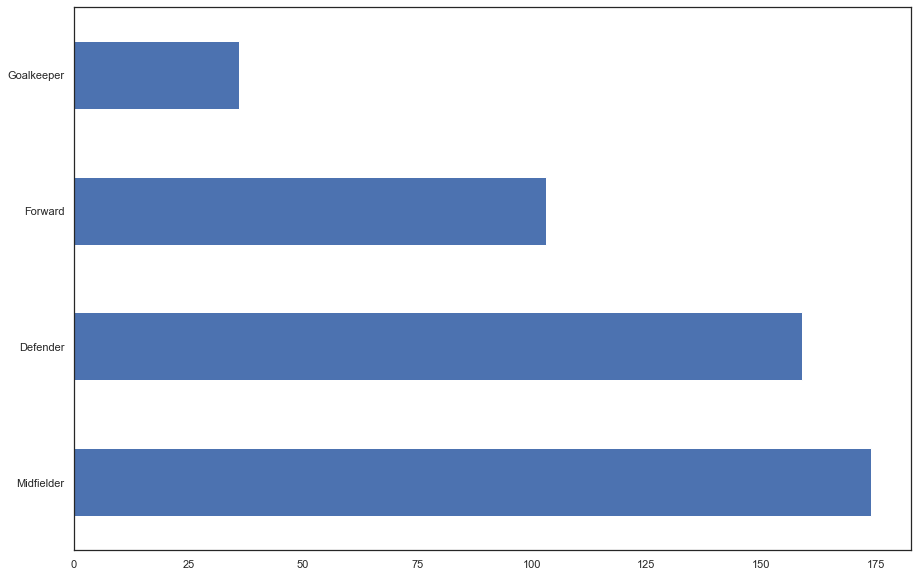

In [64]:
# Let's calculate the percentage of Positions accross the players.
df.Position.value_counts(normalize=False)

#plot the bar graph of positions by %
fig=plt.figure(figsize=(15,10))
df.Position.value_counts(normalize=False).plot.barh()
plt.show()

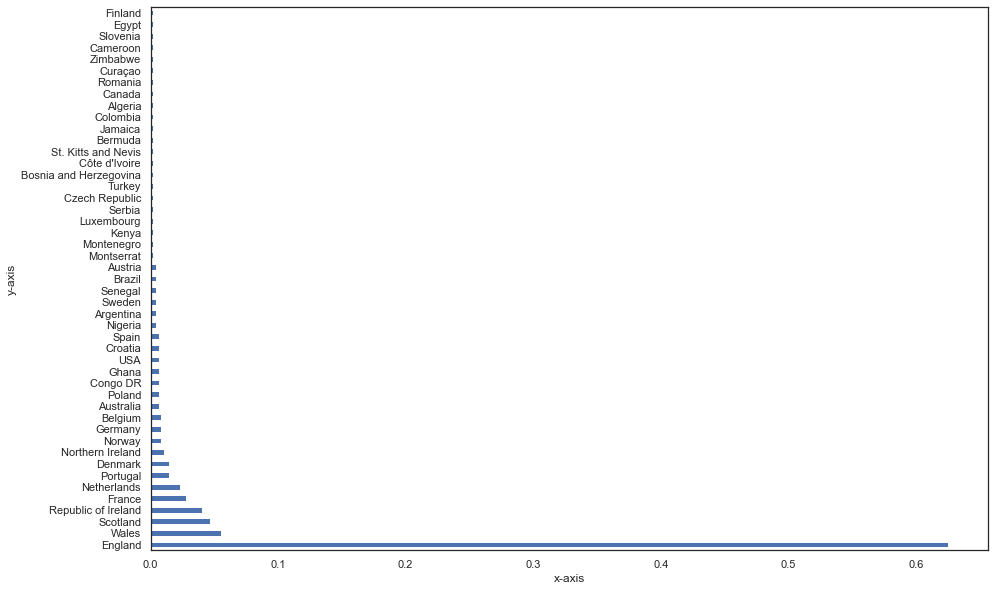

In [70]:
#We can plot a similar chart to assess the spread of nationalities accross the league
fig=plt.figure(figsize=(15,10))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
df.Country.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
#It is obvious that over 3 quarters of Championship players are from the British Isles, with the overwhelming majority of players identifying as English

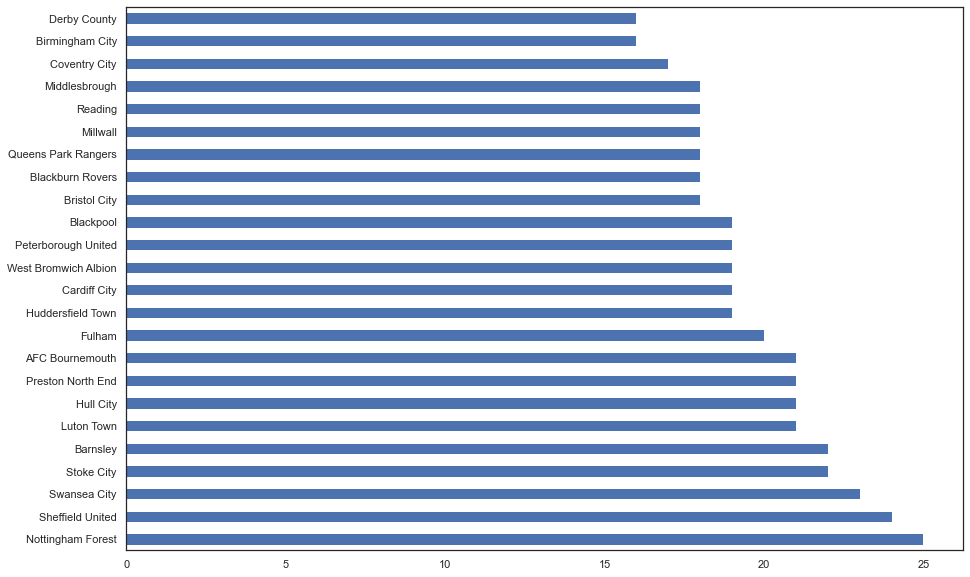

In [66]:
#Squad Sizes
fig=plt.figure(figsize=(15,10))
df.Club.value_counts(normalize=False).plot.barh()
plt.show()
#The plot below shows that Derby County have the smallest squad size whilst their East Midland rivals, Nottingham Forest, boast the largest squad in the league

In [ ]:
#Bivariate Analysis of Numerical Features

Text(0, 0.5, 'Player Age')

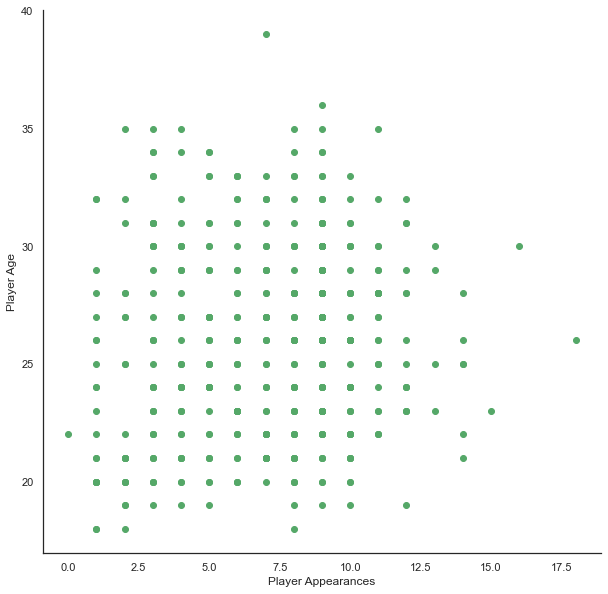

In [90]:
#We will begin the bivariate analysis by analysing the relationship between Player Appearances and Player Age

fig=plt.figure(figsize=(10,10))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(df['Appearances'], df['Age'],'go')
plt.xlabel('Player Appearances')
plt.ylabel('Player Age')

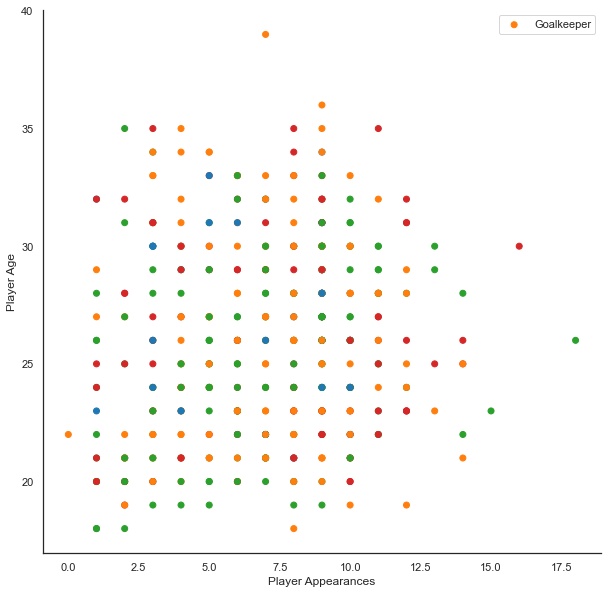

In [98]:
#As no obvious correlation between Age and Appearances is highlighted, it might be useful to introduce player positions onto the markers.

fig, ax = plt.subplots(figsize=(10, 10))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
colors = {'Goalkeeper':'tab:blue', 'Defender':'tab:orange', 'Midfielder':'tab:green', 'Forward':'tab:red'}

ax.scatter(df['Appearances'], df['Age'], c=df['Position'].map(colors))
plt.xlabel('Player Appearances')
plt.ylabel('Player Age')
plt.legend(['Goalkeeper','Defender','Midfielder','Forward'])
plt.show()

In [ ]:
#Categorical v Numerical Analysis

C:\Users\A621096\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


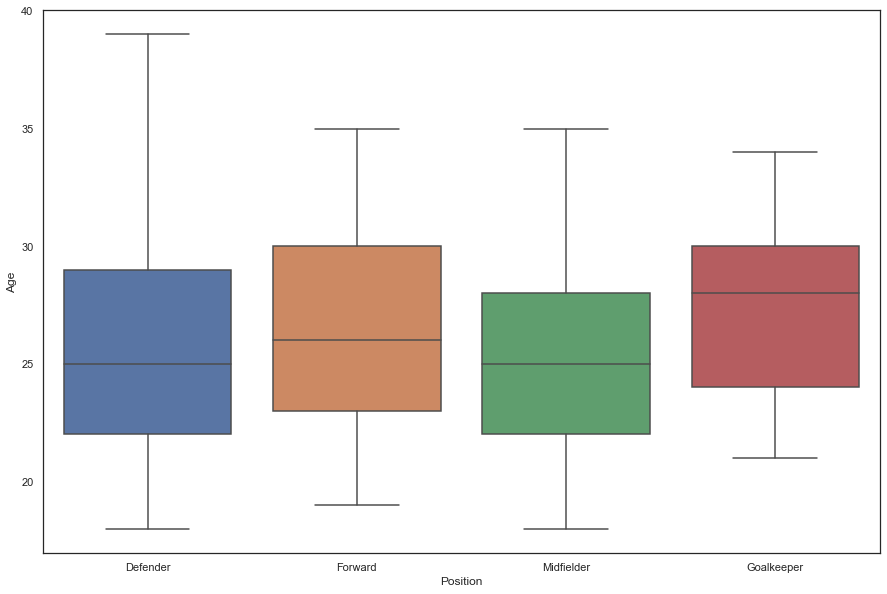

In [89]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(df.Position, df.Age)
plt.show()

In [ ]:
# We can see that Goalkeepers are, on average, older than their outfield counterparts.
# There is surprisingly little variation between the age dynamics of outfield players, with the notable exception of older defenders.

C:\Users\A621096\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


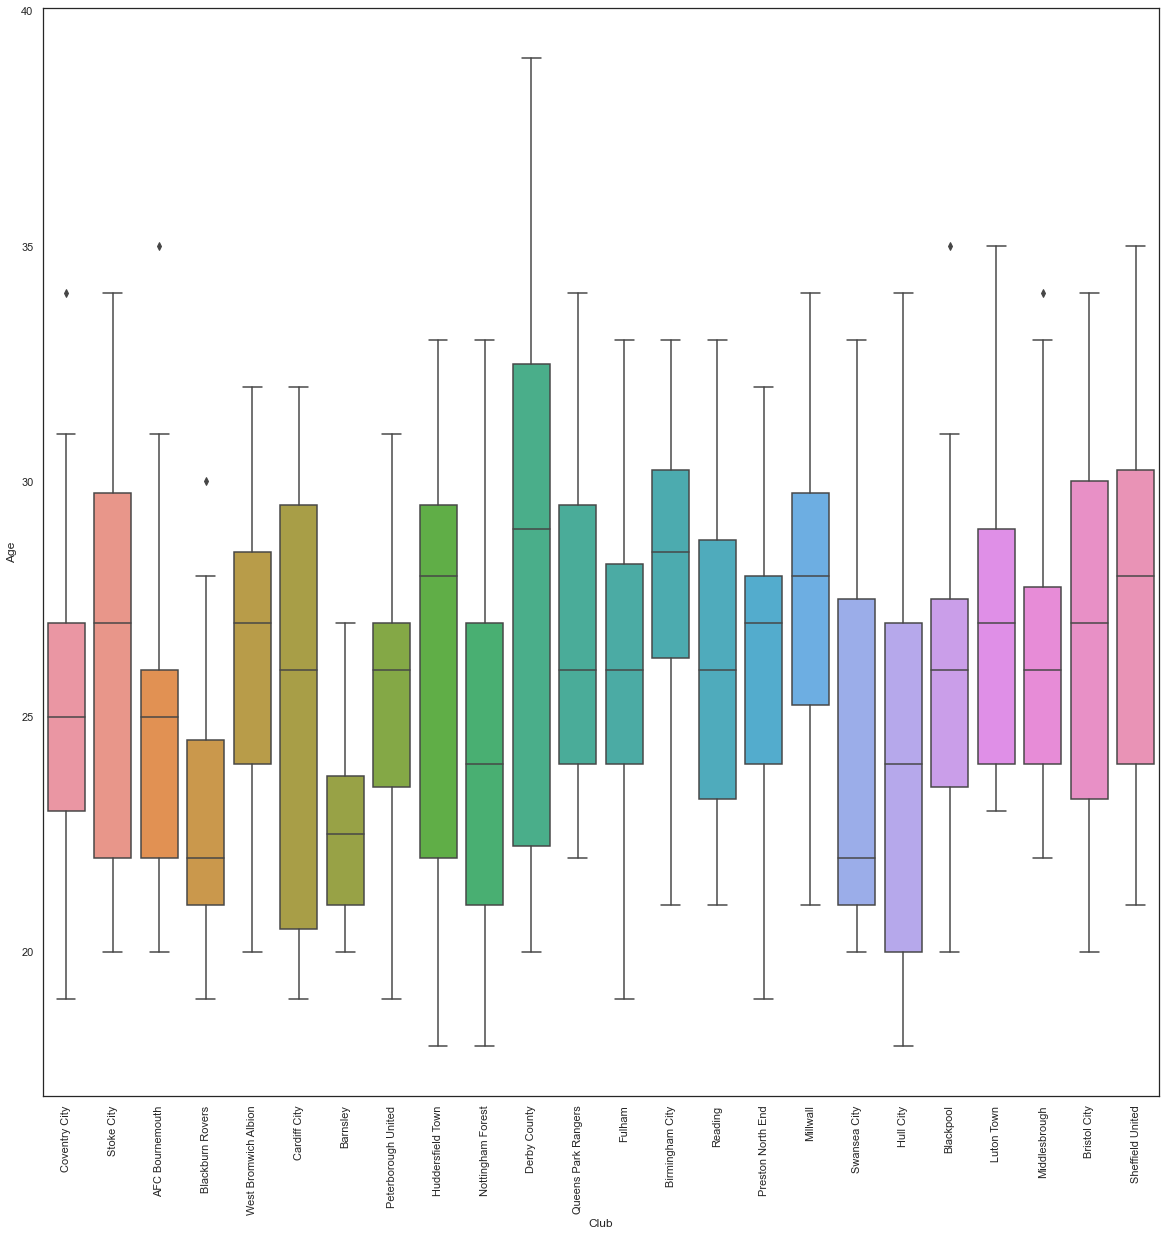

In [88]:
sns.boxplot(df.Club, df.Age)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#From the boxplot, it is evident that Derby County have both the indivdual player, and the oldest mean squad age.
#Barnsley FC however have a group of players with a smaller age range and a mean squad age that is one of the lowest in the league.
#Future analysis could investigate the impact of mean squad age on squad performance.

In [ ]:
#Multivariate Analysis

Position  Defender   Forward  Goalkeeper  Midfielder
Age                                                 
18        8.000000       NaN         NaN    1.333333
19        8.000000  2.000000         NaN    5.800000
20        5.000000  5.333333         NaN    4.230769
21        6.444444  6.142857    5.000000    5.416667
22        5.928571  8.250000    8.500000    7.538462
23        8.142857  8.692308    2.500000    6.888889
24        7.100000  6.142857    8.000000    6.954545
25        8.083333  7.428571         NaN    6.454545
26        7.888889  9.000000    7.800000    7.421053
27        5.785714  7.833333    8.500000    7.357143
28        9.533333  4.000000    9.200000    7.928571
29        7.200000  6.428571    7.333333    8.000000
30        7.615385  8.400000    3.250000    8.846154
31        5.250000  7.857143    7.250000    6.500000
32        7.500000  6.571429    1.000000    8.000000
33        6.166667  7.000000    5.000000    7.500000
34        5.200000  8.000000    9.000000    3.

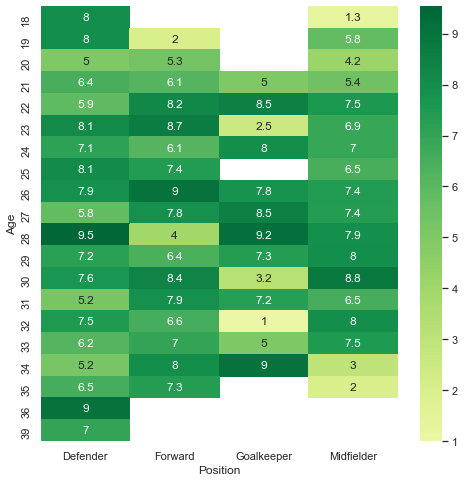

In [102]:
result = pd.pivot_table(data=df, index='Age', columns='Position',values='Appearances')
print(result)

#create heat map of education vs marital vs response_rate
fig=plt.figure(figsize=(8,8))
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

In [ ]:
#Whilst the output is not incredibly telling at this point (probably due to the early stage of the season from when the data was scraped), we can see how this heatmap could be useful to understand any multivariate correlations.
